# <font color='blue'>Data Science Academy</font>

# <font color='blue'>Big Data Real-Time Analytics com Python e Spark</font>

## <font color='blue'>Projeto 3 - Projetos com Feedback</font>

### <font color='blue'> Previsão do Nível de Satisfação do Cliente Santander </font>



### Definindo o problema de negócio :

- Prever se um cliente está satisfeito ou insatisfeito com sua experiência bancária, a fim de identificar clientes insatisfeitos no inicio do relacionamento para permitir  que o banco Santander adote medidas proativas para melhorar a felicidade de um cliente antes que seja tarde demais.

- Fonte de Dados: o grupo Santander disponibilizou um dataset no kaggle (https://www.kaggle.com/c/santander-customer-satisfaction).
- Para efeito de exercício decidi utlizar somente o dataset "train.csv".

- Dicionário:
    - variável TARGET : 
        - valor 0 - clientes satisfeito; e
        - valor 1 - clientes insatisfeito;
               
               

In [1]:
import joblib # salvar o modelo depois do treinamento
import pickle # salvar o modelo depois do treinamento em disco
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn # permite trabalhar com ML
from sklearn.model_selection import train_test_split # divide os dados em treino e teste
from sklearn.model_selection import GridSearchCV # realizar otimização de hiperparâmetros
from sklearn.model_selection import RandomizedSearchCV # outra técnica de otimizaçao de hiperparâmetros
from sklearn.linear_model import LogisticRegression # pacote do algorítimo de regressão logística
from sklearn.ensemble import RandomForestClassifier # algorítimo de classificação
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier # algorítimo Decision Tree
from sklearn.metrics import confusion_matrix # métricas para escolha do melhor modelo
from sklearn.metrics import accuracy_score # métrica para escolha do modelo
from scikitplot.metrics import plot_confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

### Carregando o conjunto de dados

In [2]:
dados_treino = pd.read_csv("dados/train.csv/train.csv")

In [3]:
dados_teste = pd.read_csv("dados/test.csv/test.csv")

In [4]:
dados_submission = pd.read_csv("dados/sample_submission.csv")

###  Analise Exploratória dos Dados

In [5]:
dados_treino.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [6]:
dados_teste.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [7]:
dados_submission.head()

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0


In [8]:
print(dados_treino.shape, dados_teste.shape, dados_submission.shape)

(76020, 371) (75818, 370) (75818, 2)


In [9]:
dados_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [10]:
dados_treino.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [11]:
dados_teste.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,...,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,7.581800e+04
mean,75874.830581,-1579.955011,33.138832,83.164329,74.312894,123.136448,4.578517,7.666855,0.470645,0.672444,...,0.160595,12.438559,1.327408,17.469991,12.674349,63.597839,11.404505,95.973025,70.504319,1.173863e+05
std,43882.370827,39752.473358,12.932000,1694.873886,364.211245,606.431562,133.383326,239.701416,34.028605,42.336668,...,32.441677,958.651673,170.449935,1252.618781,895.165516,3754.668954,1061.858193,4658.871575,3318.527783,2.479384e+05
min,2.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.600000,-0.600000,0.000000,0.000000,0.000000,0.000000,1.202730e+03
25%,37840.250000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.754961e+04
50%,75810.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.057643e+05
75%,113996.500000,2.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.183159e+05
max,151837.000000,238.000000,105.000000,240000.000000,21093.960000,47943.960000,21093.960000,47943.960000,6600.000000,6600.000000,...,8030.160000,146605.320000,40080.600000,162355.800000,138054.960000,453893.400000,217762.230000,496198.080000,354260.730000,2.889440e+07


In [12]:
# Na minha avaliação os dados não estão bem dividos.
# A decisão foi juntar os três conjuntos de dados, pra dividi-los em uma proporção melhor.
#juntando dados teste com dados_submission

dados_merge_teste_submission = pd.merge(dados_teste, dados_submission, on = "ID")


In [13]:
dados_merge_teste_submission.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10,0
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72,0
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95,0
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61,0
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73,0


In [14]:
# Retirando as colunas ID
dados = pd.concat([dados_treino, dados_merge_teste_submission], ignore_index = True)

In [15]:
dados.shape

(151838, 371)

In [16]:
dados.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


###  Analise Exploratória dos Dados:

In [17]:
# Verificando se há variáveis categóricas:
dados.dtypes[dados_treino.dtypes == "object"]

Series([], dtype: object)

In [18]:
dados.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,151838.000000,151838.000000,151838.000000,151838.000000,151838.000000,151838.000000,151838.000000,151838.000000,151838.000000,151838.000000,...,151838.000000,151838.000000,151838.000000,151838.000000,151838.000000,151838.000000,151838.000000,151838.000000,1.518380e+05,151838.000000
mean,75919.500000,-1551.539391,33.175898,84.688322,73.336683,121.330641,4.068145,7.068982,0.441757,0.619828,...,10.184196,1.346302,14.839290,10.726624,47.530234,6.625190,85.986327,63.550096,1.173110e+05,0.019811
std,43831.999424,39394.010507,12.944275,1655.242347,351.967351,577.094428,115.015926,201.304542,32.359675,39.528498,...,750.300862,144.945384,1044.316933,738.430127,3011.415348,757.611606,4360.172261,3094.024954,2.177175e+05,0.139349
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.600000,-0.600000,0.000000,0.000000,0.000000,0.000000,1.202730e+03,0.000000
25%,37960.250000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.770562e+04,0.000000
50%,75919.500000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.061020e+05,0.000000
75%,113878.750000,2.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.185435e+05,0.000000
max,151838.000000,238.000000,105.000000,240000.000000,21093.960000,47943.960000,21093.960000,47943.960000,6600.000000,6600.000000,...,146605.320000,40080.600000,162355.800000,138054.960000,453893.400000,217762.230000,681462.900000,397884.300000,2.889440e+07,1.000000


In [19]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151838 entries, 0 to 151837
Columns: 371 entries, ID to TARGET
dtypes: float64(115), int64(256)
memory usage: 429.8 MB


### Limpeza de Dados

In [20]:
# Tratamento de valores duplicados:

print( "A quantidade de dados duplicados é: {}".format(dados.duplicated().sum()))

A quantidade de dados duplicados é: 0


In [21]:
# Tratamento de valores ausentes:
print( "Existem valores ausentes ? : {}" .format(dados.isna().sum().any()))

Existem valores ausentes ? : False


In [22]:
dados.columns.has_duplicates

False

In [23]:
# removendo as variáveis que sós possuem um único valor.
#for i in dados.columns:
#    if dados[i].nunique() == 1:
#       print(i)
#        dados.drop(i, inplace = True, axis = 1)

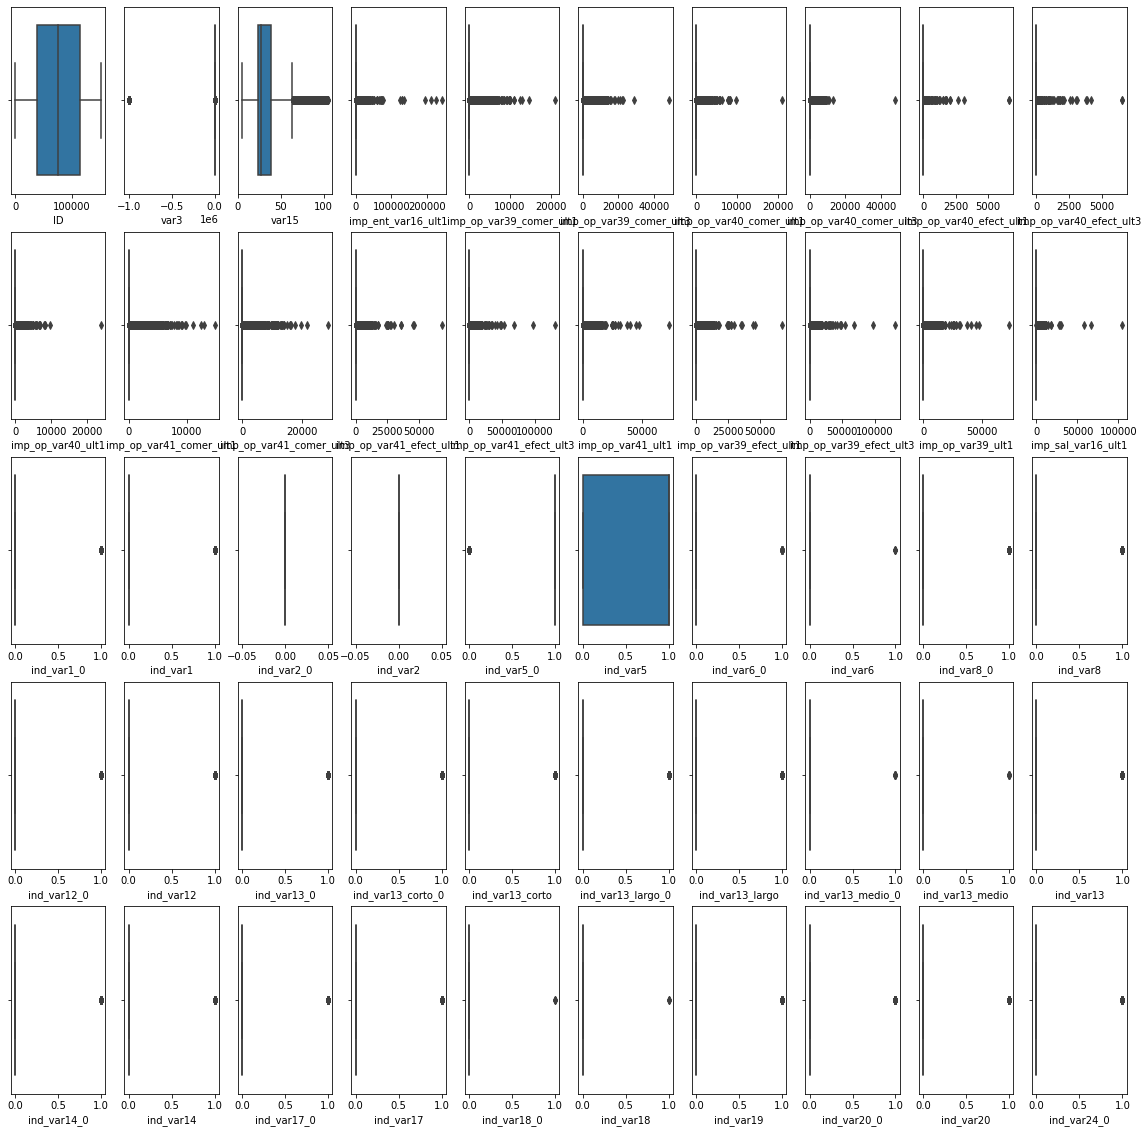

In [24]:
plt.figure(figsize = (20,20))
for i in range (50):
    plt.subplot(5, 10, i+1)
    sns.boxplot(dados.iloc[:,i])
    plt.xlabel(dados.columns[i], size = 10)

* A remoção dos outliers removeu  toda a  classe 1 do conjunto de dados e uma boa parte dos dados. Por isso, decidi manter os valores outliers.

In [25]:
### Remoção dos outliers. Retornam o indice dos valores que preenchem a condição de index

#def Outliers(data, ft):
#    IQ1 = data[ft].quantile(0.25)
 #   IQ3 = data[ft].quantile(0.75)
#    IQR = IQ3 - IQ1
    
#   lower_bound = IQ1 - 1.5 * IQR
#    upper_bound = IQ3 + 1.5 * IQR
    
#    index = data.index[ (data[ft] < lower_bound) | (data[ft] > upper_bound) ]
#    return index

In [26]:
#index = []
#for i in dados.columns:
#    index.extend(Outliers(dados, i))
#index = list(set(index))
#len(index)


#

In [27]:
# print("O tamanho dos dados antes da remoção é {}".format(dados.shape))
# dados.drop(index, inplace = True, axis = 0)
# print("O tamanho dos dados depois da remoção dos outliers é {}".format(dados.shape))

In [28]:
dados = dados.drop("ID", axis = 1)


In [29]:
dados = pd.DataFrame(dados)

In [30]:
dados.shape

(151838, 370)

### Divisão em dados de Treino e Teste

In [31]:
x = dados.drop("TARGET", axis = 1)

In [32]:
y = dados.TARGET

In [33]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, 
                                                        y, 
                                                        test_size = 0.20, 
                                                        random_state = 1234,
                                                        stratify = dados.TARGET)

In [34]:
print(x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(121470, 369) (30368, 369) (121470,) (30368,)


### Balanceamento da Variável Target¶

- A escolha foi balancear a variável target com a diminuição dos dados da classse majoritária. 
-  Várias tentativas de balanceamento foram executadas com o aumento da classe minoritária, mas eram produzidos muitos dados artificiais, que avaliei estarem prejudicando o treinamento dos modelos, por não retratarem a realiadade dos dados.

In [35]:
y_treino.value_counts()

0    119064
1      2406
Name: TARGET, dtype: int64

Text(0.5, 1.0, 'Distribuição da variável "TARGET" antes do balanceamento')

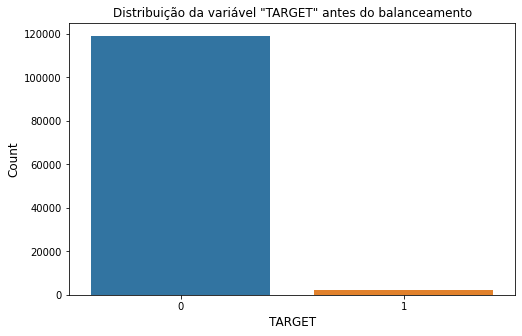

In [36]:

plt.figure(figsize = (8,5))
sns.countplot(x = y_treino)
plt.xlabel('TARGET', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribuição da variável "TARGET" antes do balanceamento', size = 12)

In [37]:
sampler = RandomUnderSampler(sampling_strategy = 0.2 )
x_sampler, y_sampler = sampler.fit_resample(x_treino, y_treino)

#smote = SMOTE()
#x_treino_us, y_treino_us = smote.fit_resample(x_treino, y_treino)

In [38]:
print(x_sampler.shape, y_sampler.shape)

# print( x_treino_us.shape, y_treino_us.shape)

(14436, 369) (14436,)


Text(0.5, 1.0, 'Distribuição da variável "TARGET" após o balanceamento')

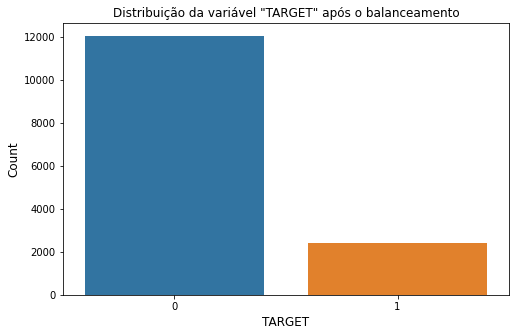

In [39]:
plt.figure(figsize = (8,5))
sns.countplot(x = y_sampler)
plt.xlabel('TARGET', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribuição da variável "TARGET" após o balanceamento', size = 12)

In [40]:
x_sampler[x_sampler.isnull().values]


,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38


### Padronização dos Dados


In [41]:
scaler = StandardScaler()
x_treino_padronizado = pd.DataFrame(scaler.fit_transform(x_sampler))

x_teste_padronizado = pd.DataFrame(scaler.fit_transform(x_teste))

In [42]:
print(len(x_treino_padronizado), len(y_sampler))

14436 14436


### Construção, Treinamento e Avaliação do Modelo 1 com algorítimo LogisticRegression

In [43]:
x_train = x_treino_padronizado

y_train = y_sampler

In [44]:
# Otimizando parâmetros
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

In [45]:
# Escolhendo o melhor modelo e treinando
modelo_v1 = GridSearchCV(LogisticRegression(), 
                         param_grid, # # métrica de comparação dos modelos
                         scoring = 'roc_auc', # métrica de comparação dos modelos
                         n_jobs = -1)
modelo_v1.fit(x_train, y_train)

print("Parâmetro de Regressaão logística Ajustada: {}".format(modelo_v1.best_params_)) 
print("Melhor Pontuação {}".format(modelo_v1.best_score_))

Parâmetro de Regressaão logística Ajustada: {'C': 0.01}
Melhor Pontuação 0.7964843061455783


In [46]:
modelo_v1.best_estimator_

LogisticRegression(C=0.01)

In [47]:
modelo_v1.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(),
 'n_jobs': -1,
 'param_grid': {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'roc_auc',
 'verbose': 0}

### Fazendo as previsões

In [48]:
y_pred_v1 = modelo_v1.predict(x_teste_padronizado)

In [49]:
y_pred_v1[1:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [50]:
y_pred_v1.shape

(30368,)

In [51]:
confusion_matrix(y_teste, y_pred_v1)

array([[28739,  1027],
       [  507,    95]], dtype=int64)

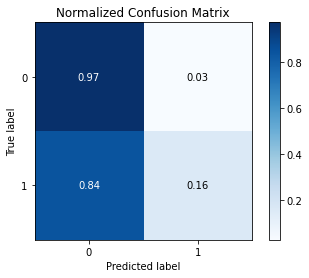

In [52]:
plot_confusion_matrix(y_teste, y_pred_v1, normalize = True)
plt.show()

In [53]:
# Acurácia em teste. A acurácia de 56% indica que a cada 100 previsões o modelo acerta 56
acuracia_v1 = accuracy_score(y_teste, y_pred_v1)
print(acuracia_v1)

0.949486301369863


### Gravando o modelo em disco

In [54]:
# Salva o modelo em disco
with open('modelos2/modelo_v1.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v1, 'modelos2/modelo_v1.pkl') 

In [55]:
df_modelos = pd.DataFrame()

# Dicionário com as métricas do modelo_v1
dict_modelo_v1 = {'Nome': 'modelo_v1', 
                  'Algoritmo': 'Regressão Logística',
                  'Acurácia': acuracia_v1}

# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v1, ignore_index = True)

display(df_modelos)

,Nome,Algoritmo,Acurácia
0,modelo_v1,Regressão Logística,0.949486


### Contrução Treinamento e Avaliação do Modelo 2 com o algorítimo RandomForestClassifier

In [56]:
tuned_params_v2 = {'n_estimators': [100, 200,300,400,500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}

In [57]:
modelo_v2 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)

In [58]:
modelo_v2.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [59]:
modelo_v2.best_estimator_

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300)

In [60]:
y_pred_v2 = modelo_v2.predict(x_teste_padronizado)

In [61]:
confusion_matrix(y_teste, y_pred_v2)

array([[29645,   121],
       [  587,    15]], dtype=int64)

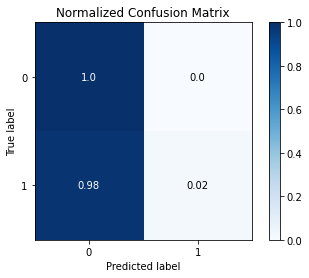

In [62]:
plot_confusion_matrix(y_teste, y_pred_v2, normalize = True)
plt.show()

In [63]:
acuracia_v2 = accuracy_score(y_teste, y_pred_v2)
print(acuracia_v2)

0.9766859852476291


In [64]:
# Salva o modelo em disco
with open('modelos2/modelo_v2.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v2, 'modelos2/modelo_v2.pkl') 

In [65]:
# Dicionário com as métricas do modelo_v1
dict_modelo_v2 = {'Nome': 'modelo_v2', 
                  'Algoritmo': 'RandomForestClassifier',
                  'Acurácia': acuracia_v2}

# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v2, ignore_index = True)

display(df_modelos)

,Nome,Algoritmo,Acurácia
0,modelo_v1,Regressão Logística,0.949486
1,modelo_v2,RandomForestClassifier,0.976686


### Contrução Treinamento e Avaliação do Modelo 3 com SGDClassifier

In [66]:
from sklearn.linear_model import SGDClassifier

In [67]:
modelo_v3 = SGDClassifier(max_iter=1000, tol=1e-3)

In [68]:
modelo_v3.fit(x_train, y_train)

SGDClassifier()

In [69]:
y_pred_v3 = modelo_v3.predict(x_teste_padronizado)

In [70]:
y_pred_v3[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [71]:
tn, fp, fn, tp = confusion_matrix(y_teste, y_pred_v3).ravel()
print(tn, fp, fn, tp)

28222 1544 518 84


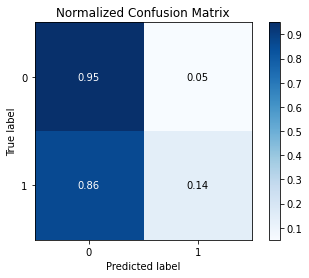

In [72]:
plot_confusion_matrix(y_teste, y_pred_v3, normalize = True)
plt.show()

In [73]:
acuracia_v3 = accuracy_score(y_teste, y_pred_v3)
print(acuracia_v3)

0.9320995785036881


In [74]:
# Salva o modelo em disco
with open('modelos2/modelo_v3.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v1, 'modelos2/modelo_v3.pkl') 

In [75]:
# Dicionário com as métricas do modelo_v1
dict_modelo_v3 = {'Nome': 'modelo_v3', 
                  'Algoritmo': 'SGDClassifier',
                  'Acurácia': acuracia_v3}

# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v3, ignore_index = True)

display(df_modelos)

,Nome,Algoritmo,Acurácia
0,modelo_v1,Regressão Logística,0.949486
1,modelo_v2,RandomForestClassifier,0.976686
2,modelo_v3,SGDClassifier,0.932100


### Contrução Treinamento e Avaliação do Modelo 4 com DecisionTreeClassifier

In [76]:
# Hiperparâmetros
tuned_params_v4 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}

In [77]:
# Cria o modelo com RandomizedSearchCV
modelo_v4 = RandomizedSearchCV(DecisionTreeClassifier(), 
                               tuned_params_v4, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)

In [78]:
# Treinamento
modelo_v4.fit(x_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [79]:
# Melhor modelo
modelo_v4.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=5)

In [80]:
# Previsões de classe
y_pred_v4 = modelo_v4.predict(x_teste_padronizado)

In [81]:
# Confusion matrix
confusion_matrix(y_teste, y_pred_v4)

array([[29734,    32],
       [  600,     2]], dtype=int64)

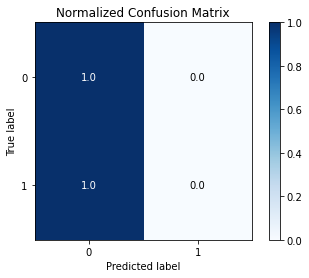

In [82]:
plot_confusion_matrix(y_teste, y_pred_v4, normalize = True)
plt.show()

In [83]:
# Calcula acurácia
acuracia_v4 = accuracy_score(y_teste, y_pred_v4)
print(acuracia_v4)

0.9791886195995785


In [84]:
# Salva o modelo em disco
with open('modelos2/modelo_v4.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v4, 'modelos2/modelo_v4.pkl') 

In [85]:
# Dicionário com as métricas do modelo_v1
dict_modelo_v4 = {'Nome': 'modelo_v4', 
                  'Algoritmo': 'DecisionTreeClassifier()',
                  'Acurácia': acuracia_v4}

# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v4, ignore_index = True)

display(df_modelos)

,Nome,Algoritmo,Acurácia
0,modelo_v1,Regressão Logística,0.949486
1,modelo_v2,RandomForestClassifier,0.976686
2,modelo_v3,SGDClassifier,0.932100
3,modelo_v4,DecisionTreeClassifier(),0.979189


### Seleção do melhor modelo

In [86]:
df_melhor_modelo = df_modelos[df_modelos['Acurácia'] == df_modelos['Acurácia'].max()]

In [87]:
df_melhor_modelo

,Nome,Algoritmo,Acurácia
3,modelo_v4,DecisionTreeClassifier(),0.979189
